In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [6]:
# Function to retrieve R&D data for a specific country and date range
def get_rd_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/GB.XPD.RSDV.GD.ZS"
    params = {
        'format': 'json',
        'date': f'{start_year}:{end_year}',
        'per_page': 100,
    }

    response = requests.get(url, params=params)
    data = response.json()[1]  # Extract data

    # Parse the data into a DataFrame
    rd_data = pd.DataFrame(data)[['date', 'value']]
    rd_data.columns = ['Year', 'R&D Spending (% of GDP)']
    rd_data['Year'] = pd.to_numeric(rd_data['Year'])
    rd_data['R&D Spending (% of GDP)'] = pd.to_numeric(rd_data['R&D Spending (% of GDP)'], errors='coerce')

    return rd_data.sort_values(by='Year')

In [7]:
# Retrieve R&D spending data for China and the United States from 2000 to 2023
start_year, end_year = 2000, 2023
china_rd = get_rd_data('CHN', start_year, end_year)
us_rd = get_rd_data('USA', start_year, end_year)

# Display the data
print("China R&D Spending")
display(china_rd)
print("USA R&D Spending")
display(us_rd)

China R&D Spending


,Year,R&D Spending (% of GDP)
23,2000,0.89316
22,2001,0.94033
21,2002,1.05786
20,2003,1.12037
19,2004,1.21498
18,2005,1.30792
17,2006,1.36854
16,2007,1.37369
15,2008,1.44592
14,2009,1.66480


USA R&D Spending


,Year,R&D Spending (% of GDP)
23,2000,2.61984
22,2001,2.63715
21,2002,2.54745
20,2003,2.55015
19,2004,2.48686
18,2005,2.50193
17,2006,2.54545
16,2007,2.61516
15,2008,2.74481
14,2009,2.79182


In [9]:
# Save the datasets
china_rd.to_csv("china_rd.csv", index = False)
us_rd.to_csv("usa_rd.csv", index = False)
print("R&D Datasets for USA and China saved successfully!")

R&D Datasets for USA and China saved successfully!


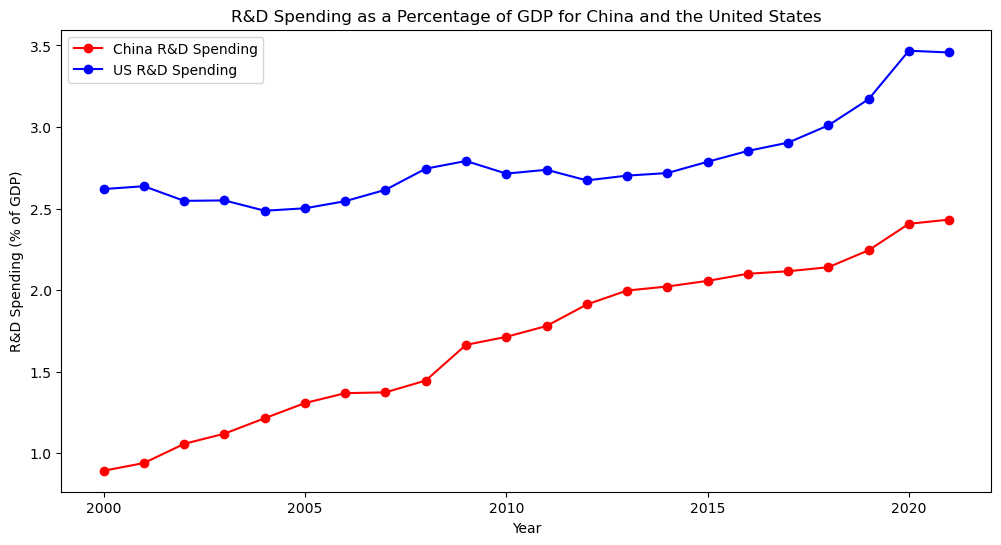

In [10]:
# Visualize R&D spending over time for both countries
plt.figure(figsize=(12, 6))
plt.plot(china_rd['Year'], china_rd['R&D Spending (% of GDP)'], label="China R&D Spending", color='red', marker='o')
plt.plot(us_rd['Year'], us_rd['R&D Spending (% of GDP)'], label="US R&D Spending", color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('R&D Spending (% of GDP)')
plt.title('R&D Spending as a Percentage of GDP for China and the United States')
plt.legend()
plt.show()

In [14]:
# Predictive Model for China’s R&D Spending
china_rd = china_rd.dropna()  # Remove rows with missing data
X_china = china_rd[['Year']]
y_china = china_rd['R&D Spending (% of GDP)']

model_china = LinearRegression()
model_china.fit(X_china, y_china)

# Predict R&D spending for China from 2024 to 2044
future_years = np.array([[year] for year in range(2024, 2044)])
future_predictions_china = model_china.predict(future_years)

# Combine historical and predicted data for China
future_df_china = pd.DataFrame({'Year': future_years.flatten(), 'Predicted R&D Spending (% of GDP)': future_predictions_china})
china_combined = pd.concat([china_rd[['Year', 'R&D Spending (% of GDP)']], future_df_china.rename(columns={'Predicted R&D Spending (% of GDP)': 'R&D Spending (% of GDP)'})])

# Save the dataset
china_combined.to_csv("china_rd.csv", index = False)
print("R&D Datasets for China saved successfully!")

# Display the future data
future_df_china

R&D Datasets for China saved successfully!


/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Year,Predicted R&D Spending (% of GDP)
0,2024,2.690030
1,2025,2.763663
2,2026,2.837295
3,2027,2.910927
4,2028,2.984559
5,2029,3.058192
6,2030,3.131824
7,2031,3.205456
8,2032,3.279088
9,2033,3.352720


In [15]:
# Predictive Model for US R&D Spending
us_rd = us_rd.dropna()  # Remove rows with missing data
X_us = us_rd[['Year']]
y_us = us_rd['R&D Spending (% of GDP)']

model_us = LinearRegression()
model_us.fit(X_us, y_us)

# Predict R&D spending for the US from 2024 to 2035
future_predictions_us = model_us.predict(future_years)

# Combine historical and predicted data for the US
future_df_us = pd.DataFrame({'Year': future_years.flatten(), 'Predicted R&D Spending (% of GDP)': future_predictions_us})
us_combined = pd.concat([us_rd[['Year', 'R&D Spending (% of GDP)']], future_df_us.rename(columns={'Predicted R&D Spending (% of GDP)': 'R&D Spending (% of GDP)'})])

# Save the dataset
us_combined.to_csv("usa_rd.csv", index = False)
print("R&D Datasets for USA saved successfully!")

# Display the future data
future_df_us

R&D Datasets for USA saved successfully!


/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Year,Predicted R&D Spending (% of GDP)
0,2024,3.259847
1,2025,3.295135
2,2026,3.330422
3,2027,3.365710
4,2028,3.400998
5,2029,3.436286
6,2030,3.471573
7,2031,3.506861
8,2032,3.542149
9,2033,3.577437


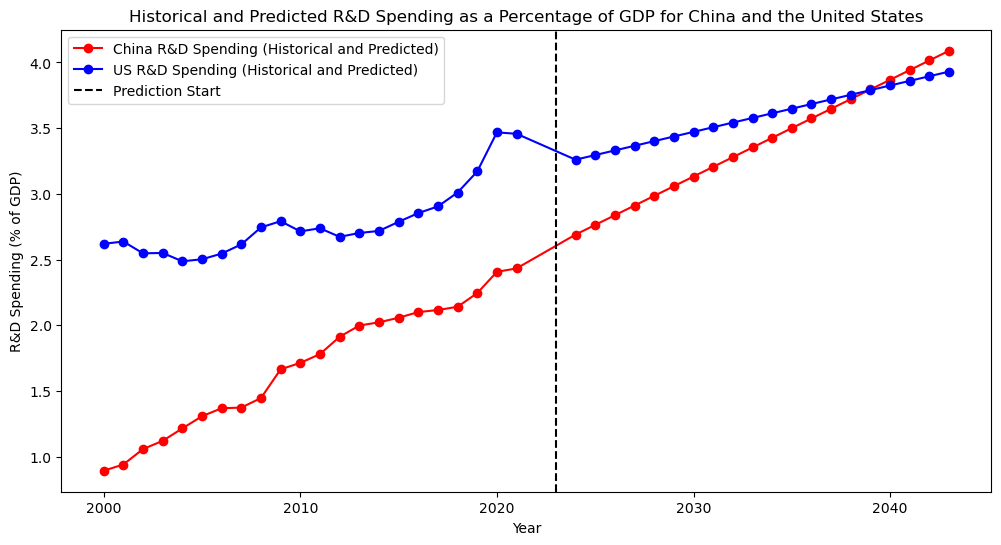

In [16]:
# Plot Historical and Predicted R&D Spending for China and the US
plt.figure(figsize=(12, 6))
plt.plot(china_combined['Year'], china_combined['R&D Spending (% of GDP)'], label="China R&D Spending (Historical and Predicted)", color='red', marker='o')
plt.plot(us_combined['Year'], us_combined['R&D Spending (% of GDP)'], label="US R&D Spending (Historical and Predicted)", color='blue', marker='o')
plt.axvline(x=2023, color='black', linestyle='--', label="Prediction Start")
plt.xlabel('Year')
plt.ylabel('R&D Spending (% of GDP)')
plt.title('Historical and Predicted R&D Spending as a Percentage of GDP for China and the United States')
plt.legend()
plt.savefig("RDSpending.png", dpi=300)  # Save plot as PNG
plt.show()